# Comparative Evaluation of Models for House Price Prediction

In this project, we compare the performance of three popular regression models - Linear Regression, Decision Tree, and Random Forest - in predicting house sale prices based on various property attributes. The goal is to identify the most accurate and robust model to support real estate decision-making. The analysis focuses on key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score to thoroughly evaluate the models' predictive capabilities.

## Importing the required libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data loading, Features selection, and Splitting

In [ ]:
# Load the house sales dataset
data = pd.read_csv('house_sales.csv')

# Preprocessing
X = data[['Sq_Ft_Tot_Living', 'Sq_Ft_Lot', 'Bathroom_count', 'Bedroom_count', 'Bldg_Grade']]
y = data['House_Sale_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standardizing the features

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Applying Linear  Regression, Decision Tree, and Random Forest

In [8]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict and evaluate the performance of Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"R2 Score: {r2_linear}")
print("-" * 40)

# Decision Tree Model
# Hyperparameter tuning for Decision Tree using GridSearchCV
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_scaled, y_train)

# Predict and evaluate the performance of Decision Tree
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_scaled)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"R2 Score: {r2_dt}")
print("-" * 40)

# Random Forest Model
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

# Predict and evaluate the performance of Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R2 Score: {r2_rf}")
print("-" * 40)

# Cross-validation for more robust performance evaluation
cv_linear = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_dt = cross_val_score(grid_search_dt.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rf = cross_val_score(grid_search_rf.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation Results (Negative MSE):")
print(f"Linear Regression: {-cv_linear.mean()}")
print(f"Decision Tree: {-cv_dt.mean()}")
print(f"Random Forest: {-cv_rf.mean()}")


Linear Regression Performance:
MAE: 147424.38310230745
MSE: 57763881515.46316
R2 Score: 0.5730999453536927
----------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree Performance:
MAE: 137971.39557515987
MSE: 54266511631.033936
R2 Score: 0.5989470206473
----------------------------------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Performance:
MAE: 124064.63167437707
MSE: 45003569073.12451
R2 Score: 0.6674041703473003
----------------------------------------
Cross-validation Results (Negative MSE):
Linear Regression: 70955823259.43185
Decision Tree: 64976713848.90413
Random Forest: 56913649567.162964


## Which model is the best?

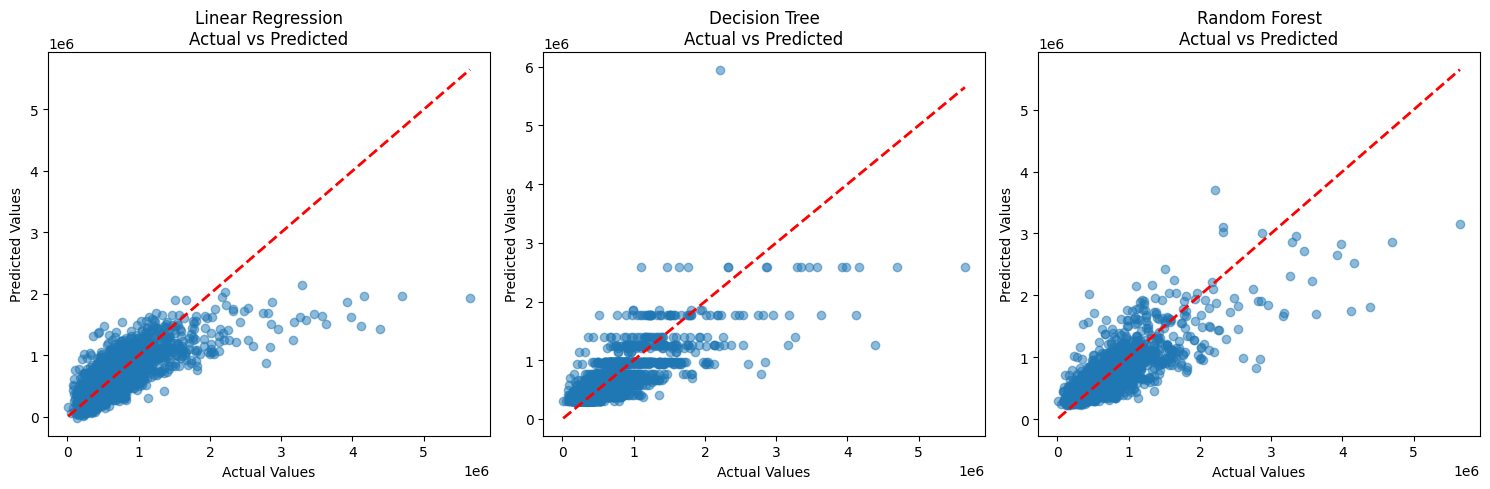

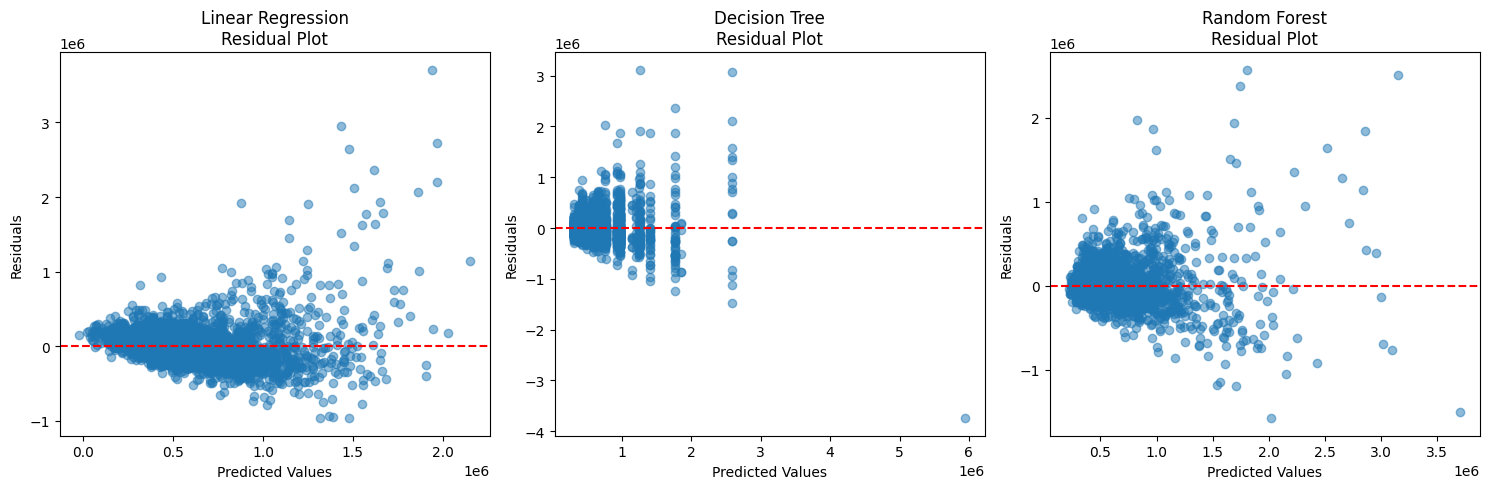

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_model_comparison(mae_values, mse_values, r2_values):
    """
    Parameters:
    - mae_values (dict): Dictionary of Mean Absolute Error for each model
    - mse_values (dict): Dictionary of Mean Squared Error for each model
    - r2_values (dict): Dictionary of R2 Scores for each model
    """
    plt.figure(figsize=(15, 5))

    # MAE Subplot
    plt.subplot(1, 3, 1)
    plt.bar(mae_values.keys(), mae_values.values())
    plt.title('Mean Absolute Error (MAE)')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)

    # MSE Subplot
    plt.subplot(1, 3, 2)
    plt.bar(mse_values.keys(), mse_values.values())
    plt.title('Mean Squared Error (MSE)')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)

    # R2 Subplot
    plt.subplot(1, 3, 3)
    plt.bar(r2_values.keys(), r2_values.values())
    plt.title('R2 Score')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred_linear, y_pred_dt, y_pred_rf):
    """
    Parameters:
    - y_test (array-like): Actual test values
    - y_pred_linear (array-like): Predicted values from Linear Regression
    - y_pred_dt (array-like): Predicted values from Decision Tree
    - y_pred_rf (array-like): Predicted values from Random Forest
    """
    plt.figure(figsize=(15, 5))

    # Linear Regression
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred_linear, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Linear Regression\nActual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Decision Tree
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred_dt, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Decision Tree\nActual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Random Forest
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_pred_rf, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Random Forest\nActual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

def plot_residuals(y_test, y_pred_linear, y_pred_dt, y_pred_rf):
    """
    Parameters:
    - y_test (array-like): Actual test values
    - y_pred_linear (array-like): Predicted values from Linear Regression
    - y_pred_dt (array-like): Predicted values from Decision Tree
    - y_pred_rf (array-like): Predicted values from Random Forest
    """
    plt.figure(figsize=(15, 5))

    # Linear Regression Residuals
    plt.subplot(1, 3, 1)
    residuals_linear = y_test - y_pred_linear
    plt.scatter(y_pred_linear, residuals_linear, alpha=0.5)
    plt.title('Linear Regression\nResidual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    # Decision Tree Residuals
    plt.subplot(1, 3, 2)
    residuals_dt = y_test - y_pred_dt
    plt.scatter(y_pred_dt, residuals_dt, alpha=0.5)
    plt.title('Decision Tree\nResidual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    # Random Forest Residuals
    plt.subplot(1, 3, 3)
    residuals_rf = y_test - y_pred_rf
    plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
    plt.title('Random Forest\nResidual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

plot_model_comparison(
    {'Linear Regression': mae_linear, 'Decision Tree': mae_dt, 'Random Forest': mae_rf},
    {'Linear Regression': mse_linear, 'Decision Tree': mse_dt, 'Random Forest': mse_rf},
    {'Linear Regression': r2_linear, 'Decision Tree': r2_dt, 'Random Forest': r2_rf}
)

plot_actual_vs_predicted(y_test, y_pred_linear, y_pred_dt, y_pred_rf)

plot_residuals(y_test, y_pred_linear, y_pred_dt, y_pred_rf)

Based on the performance metrics, the Random Forest model outperforms the Decision Tree and Linear Regression models across MAE, MSE, and R2 score. It shows the lowest error and highest R2 score,
 which means it is the most accurate and robust model for this dataset. The Random Forest model is the clear choice as the best performing model among the three.